<b>1</b> OBTENCIÓN DE DATOS

In [1]:
import definirCorrelacionVariables
from matplotlib import pyplot
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as pl

data= definirCorrelacionVariables.getDataFromDataBase()

<b>2</b> pre PROCESAMIENTO DE DATA

In [2]:
dataframe,datos,dictGeneral = definirCorrelacionVariables.generarMatrizDatos(data)

3. OBTENCIÓN DE CORRELACIÓN MÚLTIPLE

<AxesSubplot:>

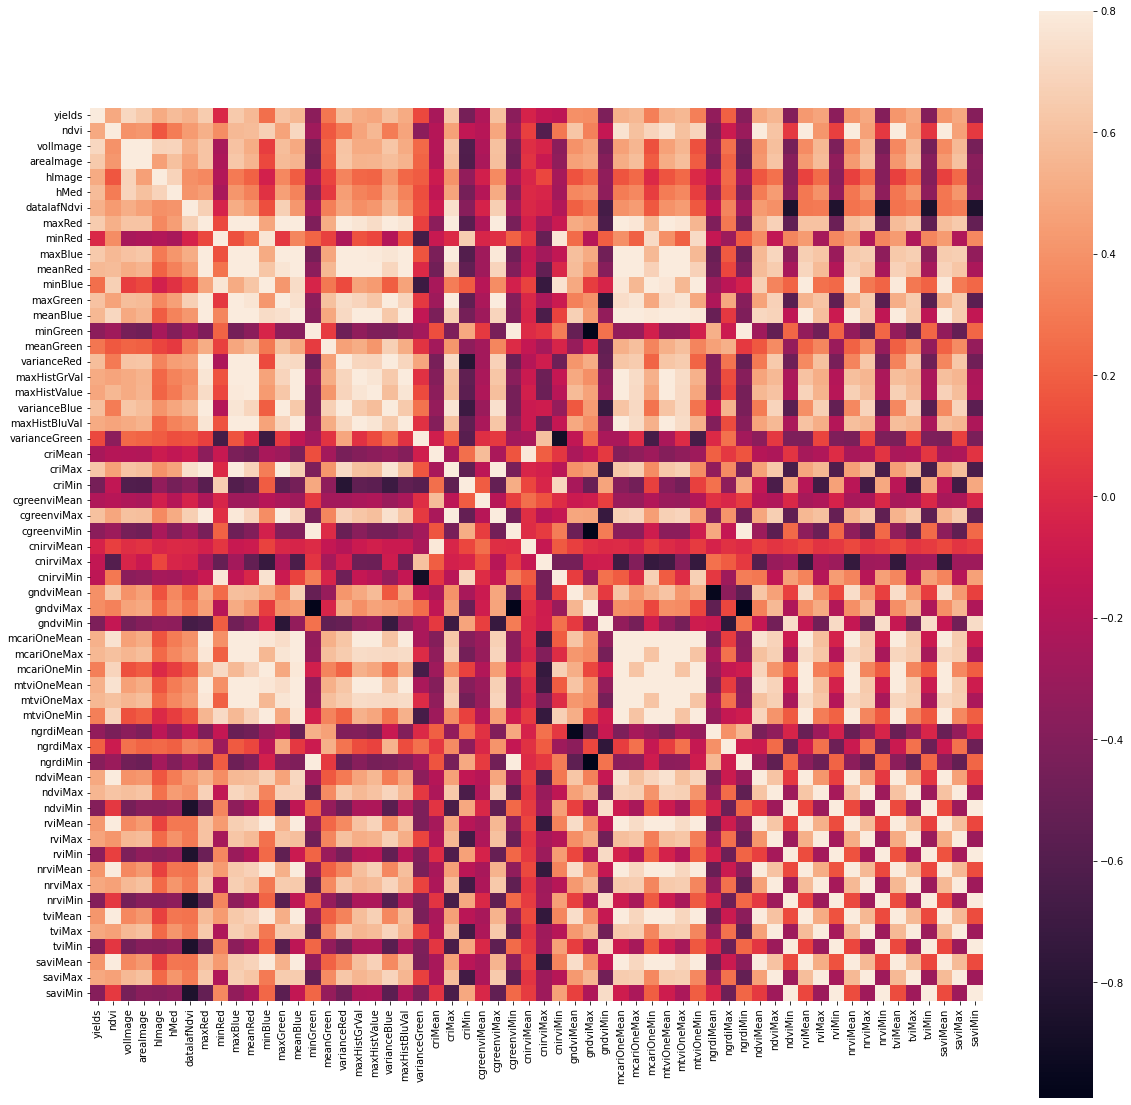

In [3]:
correlation=[]
correlation=dataframe.corr(method="pearson")
f, ax = pyplot.subplots(figsize=(20,20))
sns.heatmap(correlation,vmax=0.8,square=True)

GRAFICAS ENTRE VARIABLES

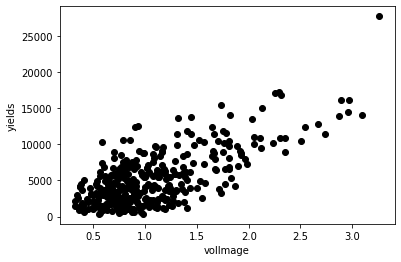

In [4]:
#pyplot.scatter(datos.datosVolumen, datos.datosVolumenCalculado,c="red")
#pyplot.scatter(datos.datosArea, datos.datosAreaCalculada,c="red")
#pyplot.scatter(datos.datosNdvi, datos.datosVolumenCalculado,c="blue")
#pyplot.scatter(datos.datosAltura, datos.datosNdvi,c="green")
pyplot.scatter(dataframe["volImage"],dataframe["yields"],c="black")
pyplot.xlabel("volImage")
pyplot.ylabel("yields")

pyplot.show()

SE CALCULA LA VARIABLE EL IAF
$Ac = \pi*r*g $

$g = \sqrt(h^2 + r^2) $

Se tiene que $r = Di/2$

$Ac = \pi*r*\sqrt(h^2 + r^2)$

$Ac = \pi*\frac{Di}{4}*\sqrt(4*h^2 + Di^2)$

Diametro

$diameter = 2*\sqrt(\frac{area}{\pi})$

In [5]:

import math
areaLateral = []
volumeFromDiameter = []
diametros=[]
for index,x in enumerate(datos.datosArea):
    diametro = 2*math.sqrt(x/math.pi)
    diametros.append(diametro)
    altura= datos.datosAlturaCalculada[index]/100
    valueAreaLateral=diametro*math.sqrt((diametro*diametro)+4*(altura*altura))
    valueVolume = math.pi*diametro*diametro*altura*(1/6)
    volumeFromDiameter.append(valueVolume)
    areaLateral.append(valueAreaLateral)


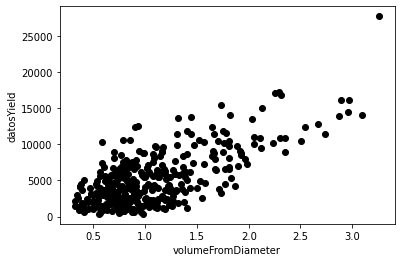

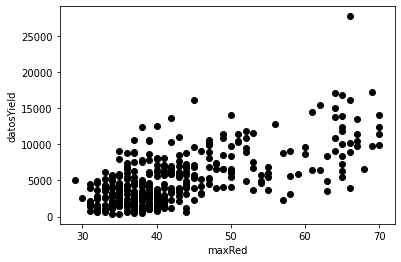

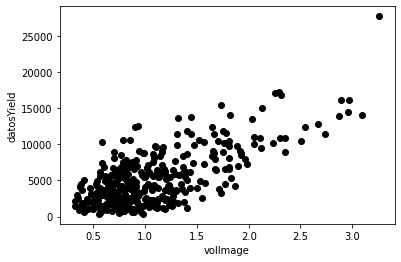

In [6]:
pyplot.scatter(volumeFromDiameter,datos.datosYeld,c="black")
pyplot.xlabel("volumeFromDiameter")
pyplot.ylabel("datosYield")

pyplot.show()

pyplot.scatter(dataframe["maxRed"],datos.datosYeld,c="black")
pyplot.xlabel("maxRed")
pyplot.ylabel("datosYield")

pyplot.show()

pyplot.scatter(datos.datosVolumenImagen,datos.datosYeld,c="black")
pyplot.xlabel("volImage")
pyplot.ylabel("datosYield")

pyplot.show()

<b style="color:orange;">LAI CALCULATED FROM EQUATION BASED ON VOLUME and AREA</b>

Se calcula el IAF usando Volumen Imagen y Yield

$IAF =  0.0134 + 2.7791 Vc$

Se calcula IAF usando Area Lateral y Yield

$IAF =  -0.5786 + 0.7896 Alat $


In [7]:

IAF_from_volume = definirCorrelacionVariables.objective(datos.datosVolumenImagen, 2.7791,0.0134)
IAF_from_area = definirCorrelacionVariables.objective(areaLateral, 0.7896,-0.5786)
d = {"latArea":areaLateral, "IAF_VOL":IAF_from_volume, "IAF_AREA":IAF_from_area}
dictGeneral.update(d)
dframeFinal = pd.DataFrame(data=dictGeneral)
pd.options.display.float_format = '{:,.2f}'.format
dataFrameCorrs=dframeFinal.loc[:,["yields","volImage","criMax","latArea","hImage","hMed","tviMin","ndviMax","cgreenviMax"]]
dfCors= dataFrameCorrs.corr(method="pearson")
dfCors.round(decimals=3)
print(dfCors)
dfCors.to_latex("CorrelationsTab.tex")

             yields  volImage  criMax  latArea  hImage  hMed  tviMin  ndviMax  \
yields         1.00      0.71    0.63     0.69    0.50  0.58   -0.39     0.55   
volImage       0.71      1.00    0.62     0.99    0.69  0.69   -0.46     0.60   
criMax         0.63      0.62    1.00     0.61    0.40  0.47   -0.65     0.63   
latArea        0.69      0.99    0.61     1.00    0.74  0.72   -0.45     0.58   
hImage         0.50      0.69    0.40     0.74    1.00  0.69   -0.39     0.27   
hMed           0.58      0.69    0.47     0.72    0.69  1.00   -0.35     0.44   
tviMin        -0.39     -0.46   -0.65    -0.45   -0.39 -0.35    1.00    -0.30   
ndviMax        0.55      0.60    0.63     0.58    0.27  0.44   -0.30     1.00   
cgreenviMax    0.60      0.60    0.91     0.60    0.36  0.50   -0.55     0.67   

             cgreenviMax  
yields              0.60  
volImage            0.60  
criMax              0.91  
latArea             0.60  
hImage              0.36  
hMed                0.50  


<b style="color:red;">Area Lateral Vs Datos Yield</b>

Se calcula el desempeño del modelo usando Area Lateral y Yield

In [8]:

popt, pcov = curve_fit(definirCorrelacionVariables.objective, areaLateral, datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(areaLateral, *popt)
r2_score(datos.datosYeld, y_pred)

0.4816878575169721

<b style="color:red;">Volumen From Diametro Vs Datos Yield</b>

Se calcula el desempeño del modelo usando Volumen calculado desde el diametro y Yield

In [9]:
popt, pcov = curve_fit(definirCorrelacionVariables.objective, volumeFromDiameter, datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(volumeFromDiameter, *popt)
r2_score(datos.datosYeld, y_pred)

0.4991250615611431

<b style="color:red;">Volumen Calculado Vs Datos Yield</b>

Se calcula el desempeño del modelo usando Volumen calculado desde el diametro y Yield

In [10]:
popt, pcov = curve_fit(definirCorrelacionVariables.objective, datos.datosVolumenCalculado, datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(datos.datosVolumenCalculado, *popt)
r2_score(datos.datosYeld, y_pred)

0.4916788211067784

<b style="color:red;">Volumen Imagen Vs Datos Yield</b>

Se calcula el desempeño del modelo usando Volumen Imagen y Yield

In [11]:
popt, pcov = curve_fit(definirCorrelacionVariables.objective, datos.datosVolumenImagen, datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(datos.datosVolumenImagen, *popt)
r2_score(datos.datosYeld, y_pred)

0.499125061561143

<b style="color:red;">ndviMax Vs Datos Yield</b>

In [12]:
popt, pcov = curve_fit(definirCorrelacionVariables.objective, dframeFinal["ndviMax"], datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(dframeFinal["ndviMax"], *popt)
r2_score(datos.datosYeld, y_pred)

popt, pcov = curve_fit(definirCorrelacionVariables.objective, dframeFinal["criMax"], datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(dframeFinal["criMax"], *popt)
r2_score(datos.datosYeld, y_pred)

0.39417707275894354

LINEAR REGRESSION

0.42764326657403817
5080.328656309579 -124.79526255338533


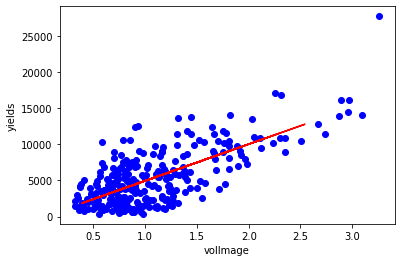

In [13]:
msk = np.random.rand(len(dframeFinal)) < 0.8
train = dframeFinal[msk]
test = dframeFinal[~msk]
popt, pcov = curve_fit(definirCorrelacionVariables.objective, train["volImage"], train["yields"])
y_pred = definirCorrelacionVariables.objective(test["volImage"], *popt)
pyplot.plot(test["volImage"], y_pred, color = 'red')
print(r2_score(test["yields"], y_pred))
print(*popt)

pyplot.scatter(train["volImage"], train["yields"],  color='blue')
pyplot.xlabel("volImage")
pyplot.ylabel("yields")
pyplot.show()

SVR

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(dataframe.volImage.values.reshape(-1, 1))
y = sc_y.fit_transform(dataframe.yields.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

regressorSVR = SVR(kernel = 'linear')
regressorSVR.fit(X_train, y_train)

regressorLinear = LinearRegression()
regressorLinear.fit(X_train, y_train)

sdgRegressor= linear_model.SGDRegressor(loss="squared_epsilon_insensitive")
sdgRegressor.fit(X_train, y_train)

rfRegression= RandomForestRegressor()
rfRegression.fit(X_train, y_train)

dtRegression= tree.DecisionTreeRegressor()
dtRegression.fit(X_train, y_train)

print(regressorSVR.score(X_test,y_test))
print(regressorLinear.score(X_test,y_test))
print(sdgRegressor.score(X_test,y_test))
print(rfRegression.score(X_test,y_test))
print(dtRegression.score(X_test,y_test))

X_grid = np.arange(min(X_test), max(X_test), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
pyplot.scatter(X, y, color = 'red')
pyplot.plot(X_grid, regressorSVR.predict(X_grid), color = 'blue',label='SVR')
pyplot.plot(X_grid, regressorLinear.predict(X_grid), color = 'green',label='Linear Regression')
pyplot.plot(X_grid, sdgRegressor.predict(X_grid), color = 'orange',label='SDG')
pyplot.plot(X_grid, rfRegression.predict(X_grid), color = 'black',label='Random Forest')
pyplot.plot(X_grid, dtRegression.predict(X_grid), color = 'gray',label='Decision Tree')
pyplot.legend()
pyplot.title('yields vs volImage')
pyplot.xlabel('yields')
pyplot.ylabel('volImage')

pyplot.show()





NameError: name 'train_test_split' is not defined

Multiple Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
dfsX=dframeFinal.loc[:,["volImage","ndviMax","latArea"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

X_train, X_test, y_train, y_test= train_test_split(X_multiple,y_multiple,test_size=0.2)

lr_multiple = linear_model.LinearRegression()

lr_multiple.fit(X_train,y_train)

Y_pred_test=lr_multiple.predict(X_test)
print(r2_score(y_test,Y_pred_test))
print(lr_multiple.score(X_test,y_test))

print(lr_multiple.coef_)
print(lr_multiple.intercept_)



dataframe.corr(method="pearson")




0.5627477151343059
0.5627477151343059
[ 7234.1285674  33215.73259729 -1522.99982653]
-17688.291523178377


,yields,ndvi,volImage,areaImage,hImage,hMed,dataIafNdvi,maxRed,minRed,maxBlue,...,rviMin,nrviMean,nrviMax,nrviMin,tviMean,tviMax,tviMin,saviMean,saviMax,saviMin
yields,1.00,0.49,0.71,0.64,0.50,0.58,0.53,0.65,-0.01,0.64,...,-0.36,0.41,0.49,-0.39,0.41,0.49,-0.39,0.41,0.49,-0.38
ndvi,0.49,1.00,0.40,0.42,0.16,0.30,0.43,0.53,0.38,0.57,...,0.08,0.84,0.46,0.05,0.84,0.46,0.05,0.84,0.46,0.06
volImage,0.71,0.40,1.00,0.95,0.69,0.69,0.52,0.62,-0.25,0.61,...,-0.42,0.36,0.56,-0.45,0.35,0.56,-0.46,0.36,0.57,-0.45
areaImage,0.64,0.42,0.95,1.00,0.45,0.60,0.46,0.61,-0.22,0.63,...,-0.34,0.42,0.60,-0.38,0.42,0.60,-0.38,0.43,0.60,-0.37
hImage,0.50,0.16,0.69,0.45,1.00,0.69,0.39,0.35,-0.21,0.30,...,-0.37,0.09,0.24,-0.39,0.09,0.24,-0.39,0.09,0.24,-0.39
hMed,0.58,0.30,0.69,0.60,0.69,1.00,0.41,0.45,-0.24,0.41,...,-0.33,0.29,0.41,-0.35,0.28,0.41,-0.35,0.29,0.41,-0.35
dataIafNdvi,0.53,0.43,0.52,0.46,0.39,0.41,1.00,0.67,-0.04,0.51,...,-0.84,0.28,0.31,-0.85,0.27,0.31,-0.85,0.28,0.31,-0.85
maxRed,0.65,0.53,0.62,0.61,0.35,0.45,0.67,1.00,0.12,0.92,...,-0.50,0.59,0.64,-0.54,0.58,0.64,-0.54,0.59,0.65,-0.53
minRed,-0.01,0.38,-0.25,-0.22,-0.21,-0.24,-0.04,0.12,1.00,0.15,...,0.35,0.43,-0.22,0.35,0.43,-0.22,0.35,0.43,-0.21,0.36
maxBlue,0.64,0.57,0.61,0.63,0.30,0.41,0.51,0.92,0.15,1.00,...,-0.30,0.64,0.66,-0.35,0.64,0.66,-0.35,0.65,0.67,-0.34


<b style="color:red;">SVR</b>

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
dfsX=dframeFinal.loc[:,["volImage","ndviMax","latArea"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_multiple)
y = sc_y.fit_transform(dframeFinal.yields.values.reshape(-1, 1))


X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)


regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)



print(regressor.score(X_test,y_test))

0.5968149237559556


C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h1> USO DE CROSS VAL SCORE </h1>

<b style="color:red;">LINEAR REGRESSION SIMPLE VS MULTIPLE</b>




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
dfs=dframeFinal.loc[:,["yields","volImage"]]
scores = cross_val_score(lm,dfs.volImage.values.reshape(-1, 1) ,dfs.yields.values , scoring='r2', cv=4)
print(scores)
print(np.mean(scores))


lm = LinearRegression()

dfsX=dframeFinal.loc[:,["volImage","criMax","ndviMean","maxBlue","latArea","maxGreen","saviMax","tviMax","ndviMax","maxHistBluVal"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

scores = cross_val_score(lm,X_multiple ,y_multiple , scoring='r2', cv=4)
print(scores)
print(np.mean(scores))


[0.5592212  0.55552891 0.45958938 0.33793399]
0.4780683693718533
[0.61928299 0.67811871 0.5784735  0.38040915]
0.5640710876963975


<b style="color:red;">MULTI SVR REGRESSION</b>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR

dfsX=dframeFinal.loc[:,["volImage"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_multiple)
y = sc_y.fit_transform(dframeFinal.yields.values.reshape(-1, 1))


regressor = SVR(kernel = 'linear')

scores = cross_val_score(regressor,X ,y , scoring='r2', cv=4)
print("Simple",scores)
print(np.mean(scores))



dfsX=dframeFinal.loc[:,["volImage","criMax","ndviMean","maxBlue","latArea","maxGreen","saviMax","tviMax","ndviMax","maxHistBluVal"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_multiple)
y = sc_y.fit_transform(dframeFinal.yields.values.reshape(-1, 1))


regressor = SVR(kernel = 'linear')

scores = cross_val_score(regressor,X ,y , scoring='r2', cv=4)
print("Multi",scores)
print(np.mean(scores))


Simple [0.56392294 0.54299849 0.45472669 0.3391311 ]
0.47519480794152824
Multi [0.61376303 0.65014896 0.50935009 0.36645747]
0.534929888531848


C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ut

<b style="color:red;">RANDOM FOREST REGRESSION</b>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

regr = RandomForestRegressor()

dfs=dframeFinal.loc[:,["volImage"]]
X_multiple= dfsX.values
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_multiple)
y = sc_y.fit_transform(dframeFinal.yields.values.reshape(-1, 1))


scores = cross_val_score(regr,X ,y , scoring='r2', cv=4)
print(scores)
print(np.mean(scores))


regr = RandomForestRegressor()


dfsX=dframeFinal.loc[:,["volImage","criMax","ndviMean","maxBlue","latArea","maxGreen","saviMax","tviMax","ndviMax","maxHistBluVal"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_multiple)
y = sc_y.fit_transform(dframeFinal.yields.values.reshape(-1, 1))

scores = cross_val_score(regr,X ,y , scoring='r2', cv=4)
print(scores)
print(np.mean(scores))

C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Julian 

[0.64313862 0.6408694  0.45557593 0.29813089]
0.5094287093144391


C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.62820856 0.66475405 0.46224257 0.3067079 ]
0.5154782690010115


C:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


DECISION TREEE

In [ ]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeRegressor()


dfs=dframeFinal.loc[:,["yields","volImage"]]
scores = cross_val_score(clf,dfs.volImage.values.reshape(-1, 1) ,dfs.yields.values , scoring='r2', cv=4)
print(scores)
print(np.mean(scores))


clf = tree.DecisionTreeRegressor()

dfsX=dframeFinal.loc[:,["volImage","criMax","ndviMean","maxBlue","latArea","maxGreen","saviMax","tviMax","ndviMax","maxHistBluVal"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

scores = cross_val_score(clf,X_multiple ,y_multiple , scoring='r2', cv=4)
print(scores)
print(np.mean(scores))

[ 0.02082308  0.10604911  0.07616025 -0.41472316]
-0.05292267783533558
[0.30835566 0.47421686 0.02777608 0.13448934]
0.23620948498415686


In [ ]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeRegressor()

dfsX=dframeFinal.loc[:,["volImage"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_multiple)
y = sc_y.fit_transform(dframeFinal.yields.values.reshape(-1, 1))


scores = cross_val_score(clf,X ,y , scoring='r2', cv=4)
print("Simple Regressor")
print(scores)
print(np.mean(scores))


clf = tree.DecisionTreeRegressor()

dfsX=dframeFinal.loc[:,["volImage","criMax","ndviMean","maxBlue","latArea","maxGreen","saviMax","tviMax","ndviMax","maxHistBluVal"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_multiple)
y = sc_y.fit_transform(dframeFinal.yields.values.reshape(-1, 1))


scores = cross_val_score(clf,X ,y , scoring='r2', cv=4)
print("Multi Regressor")
print(scores)
print(np.mean(scores))

Simple Regressor
[ 0.02082308  0.10604911  0.07616025 -0.41472316]
-0.05292267783533561
Multi Regressor
[0.35666353 0.45192248 0.03234441 0.13337656]
0.24357674402270546


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_score

regr = RandomForestRegressor()

dfsX=dframeFinal.loc[:,["volImage"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_multiple)
y = sc_y.fit_transform(dframeFinal.yields.values.reshape(-1, 1))


scores = cross_val_score(clf,X ,y , scoring='r2', cv=4)
print("Simple Regressor  ")
print(scores)
print(np.mean(scores))


regr = RandomForestRegressor()

dfsX=dframeFinal.loc[:,["volImage","criMax","ndviMean","maxBlue","latArea","maxGreen","saviMax","tviMax","ndviMax","maxHistBluVal"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_multiple)
y = sc_y.fit_transform(dframeFinal.yields.values.reshape(-1, 1))


scores = cross_val_score(clf,X ,y , scoring='r2', cv=4)
print("Multi Regressor  ")
print(scores)
print(np.mean(scores))

Simple Regressor  
[ 0.02082308  0.10604911  0.07616025 -0.41472316]
-0.05292267783533561
Multi Regressor  
[0.38750597 0.44766958 0.06226761 0.17152242]
0.2672413954594866
